In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBRFClassifier, XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
#loading and displaying the data
league_df=pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
display(league_df.head, league_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

<bound method NDFrame.head of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1      

None

In [3]:
#setting max number of cols displayed to 40
pd.set_option('display.max_columns',40)
league_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
#dropping game id
league_df.drop('gameId', axis=1, inplace=True)
league_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
#copying league df to a new df with no removed features
df_feat=league_df.copy()

In [6]:
#a new df that contains only target variable and controllable parts 
df_league= league_df[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills','blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills','redDeaths', 'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_league.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


In [7]:
#Function created to visualize correlation and data distribution and outliers
def corr_heatmap(league_df,digits=3, cmap='coolwarm'):
    """
    created a correlation heatmap to easily visualize multicollinerity that
    might be present in the df

    Args:
        Dataframe: df with features to check multicollinearity on
        digits(int): number of decimal places to display
        cmap(str):Colormap to display correlation range
    Returns:
        fig: Matplotlib Figure
        ax: Matplotlib Axis
    """
    #create correlation matrix from df
    cor= league_df.corr().round(digits)
    cor
    #create mask for upper triangle of matrix
    mask= np.zeros_like(cor)
    mask[np.triu_indices_from(mask)]=True

    #create heatmap correlation matrix 
    fig, ax =plt.subplots(figsize=((len(league_df.columns)),(len(league_df.columns))))
    sns.heatmap(cor,annot=True, ax=ax, cmap=cmap, vmin=-1,vmax=1,mask=mask);
    return fig, ax
def visual_eda(league_df, target, col):
    """
    plots a hist+KDE, boxplot, and scatter plot with linear reg
    line of the specified col. Use to visualize shape of data, outliers,
    and check col's corr with target var.
    Args:
        Dataframe: Dataframe containing col to plot
        target(str): Name of target var
        col(str):Name of the col to plot
    Returns:
        fig: Matplotlib  Fig
        gs: Matplotlib grid spec
    """
    #create copy variables of league_df and col
    data=league_df[col].copy()
    name=col
    
    #Calculate mean and median
    median=round(data.median(),2)
    mean=round(data.mean(),2)
    
    #Create gridspec for plots
    fig= plt.figure(figsize=(11,6))
    gs=GridSpec(nrows=2, ncols=2)
    
    ax0= fig.add_subplot(gs[0,0])
    ax1= fig.add_subplot(gs[1,0])
    ax2= fig.add_subplot(gs[:,1])
    
    #Plot distribution
    sns.histplot(data,alpha=0.5, stat='density',ax=ax0)
    sns.kdeplot(data, color='green',label='KDE', ax=ax0)
    ax0.set(ylabel='Density', title=name)
    ax0.set_title(F"Distribution of {name}")
    ax0.axvline(median,label=f'median={median:,}', color='black')
    ax0.axvline(mean,label=f'mean={mean:,}', color='black', ls=':')
    ax0.legend()
    
   #Plot Boxplot 
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Scatter Plot of {name}")

   #plot scatterplot to illustrate linearity
    sns.regplot(data=league_df, x=col, y=target, line_kws={'color':'red'}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name}")
    
   #tweak layout and display
    fig.tight_layout();
    return fig, gs



(<Figure size 2808x2808 with 2 Axes>, <AxesSubplot:>)

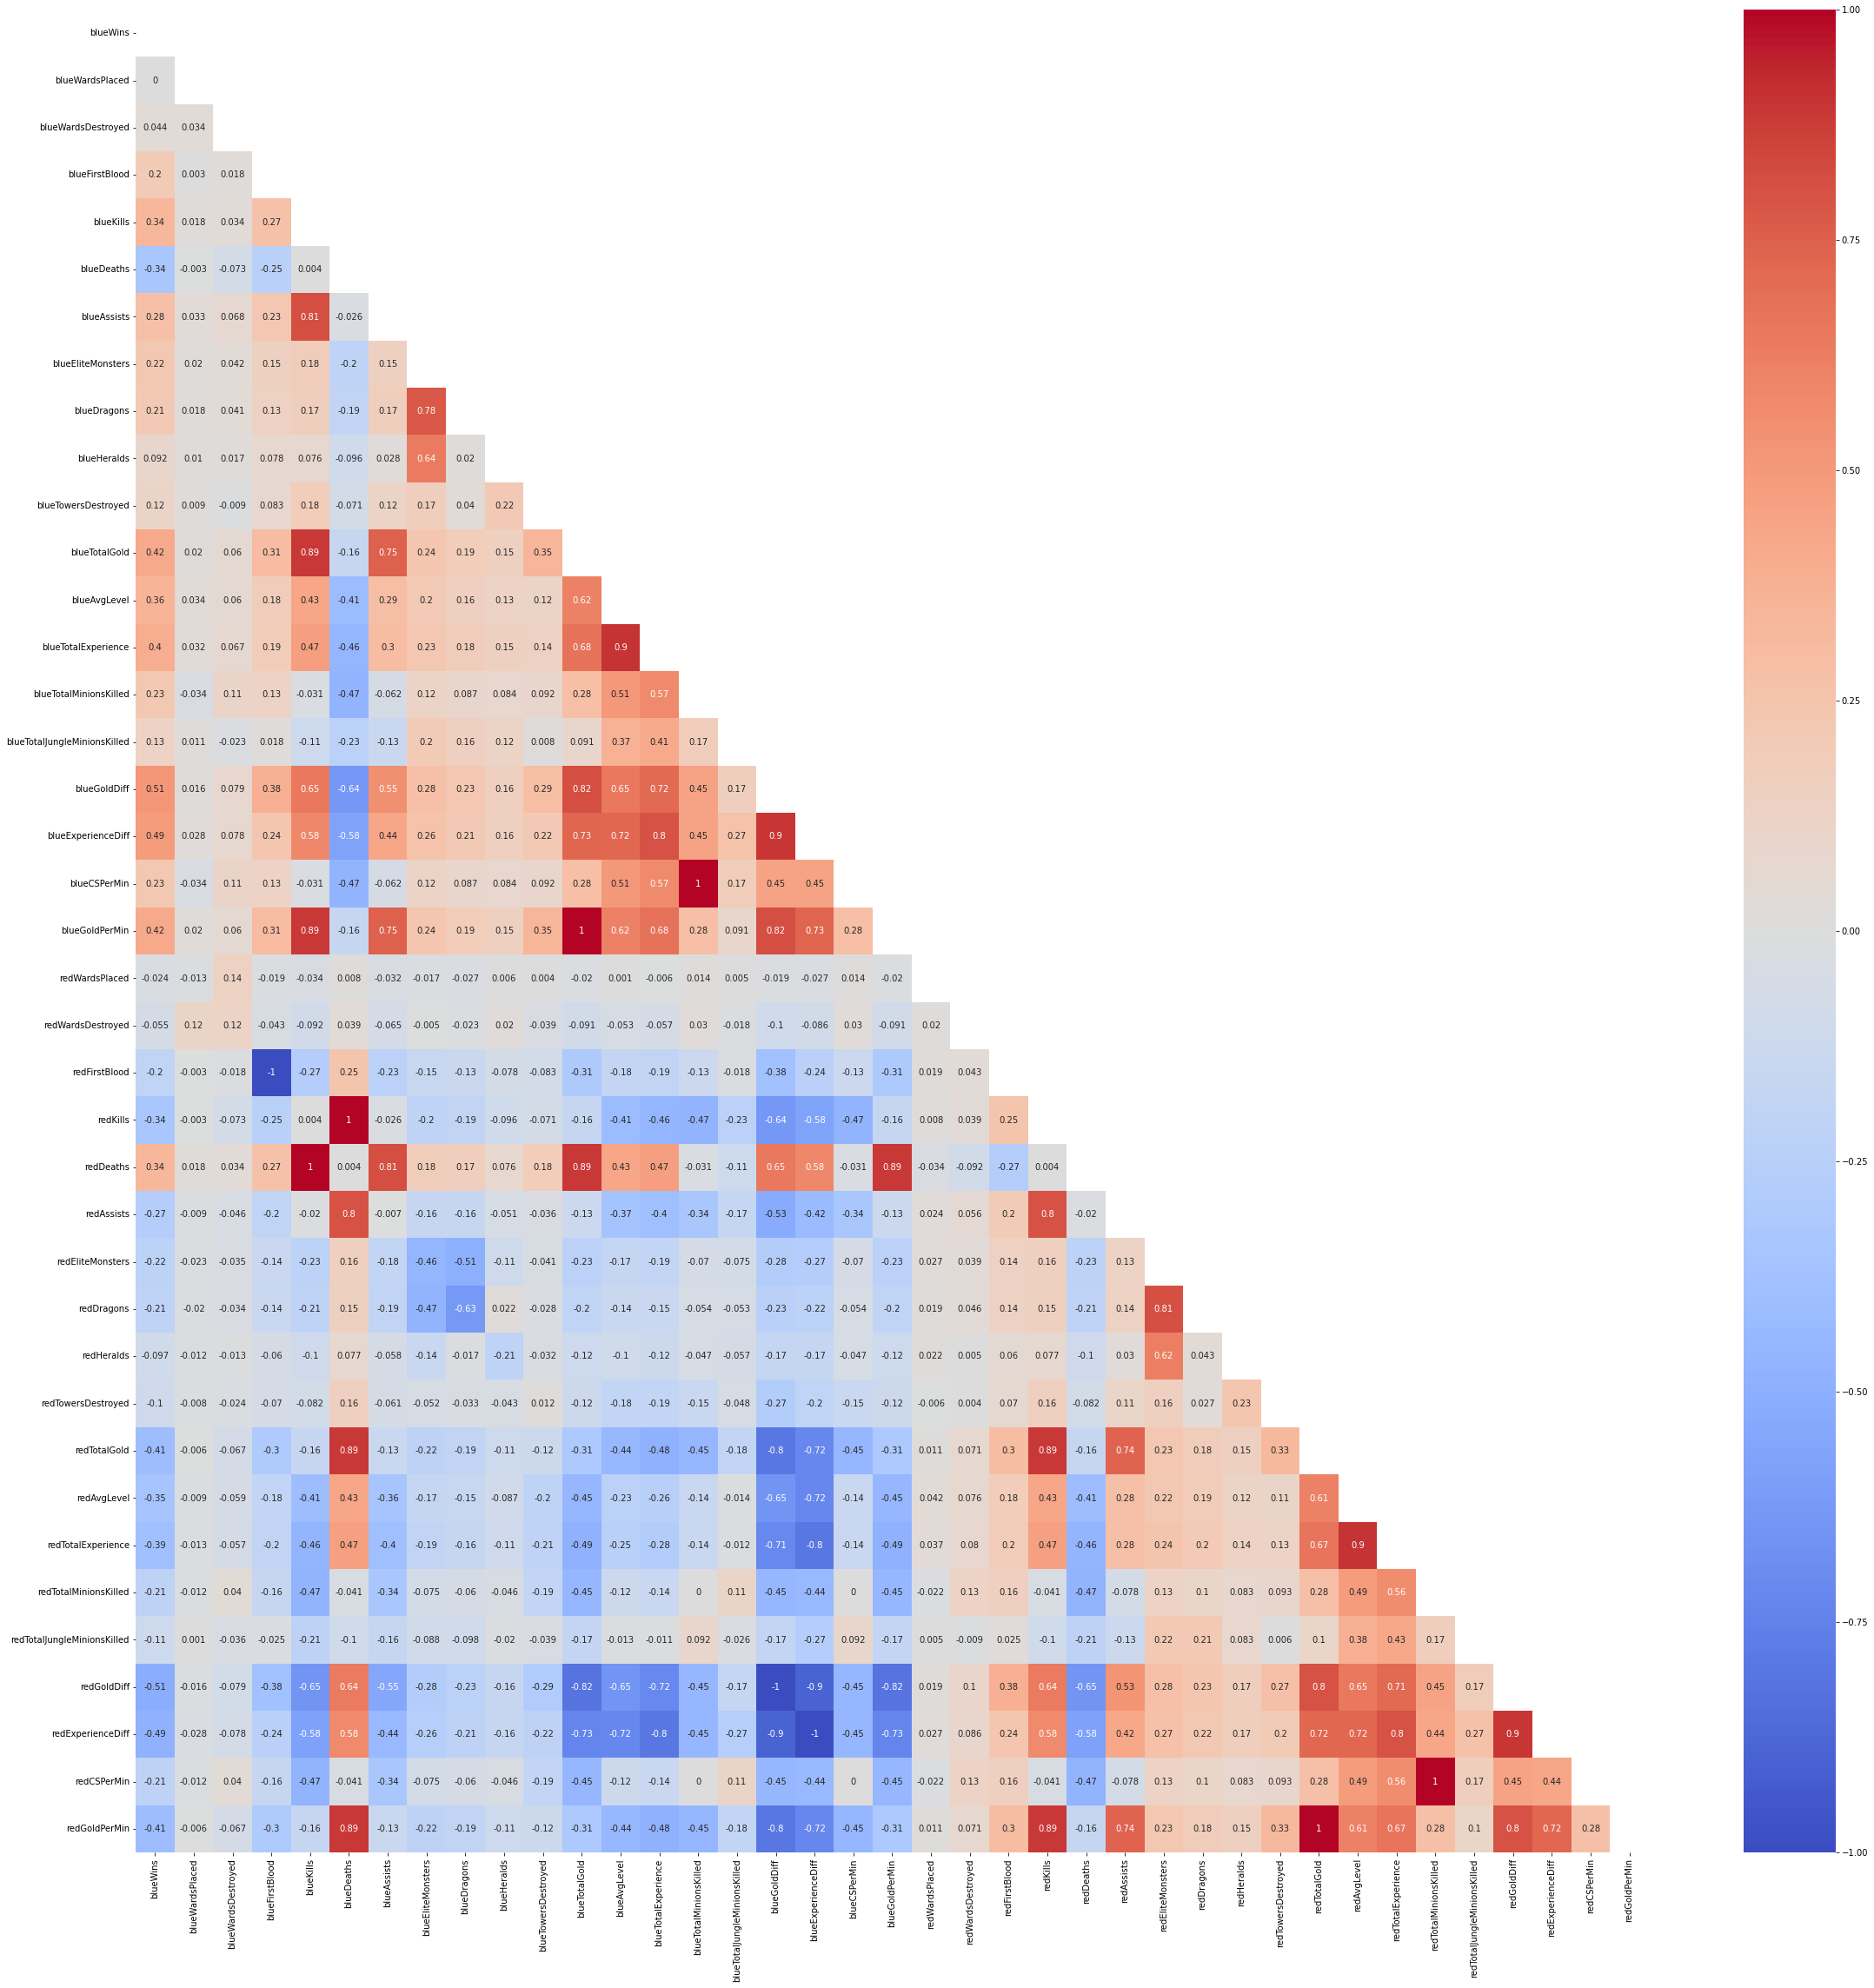

In [8]:
#Create corr heatmap for df_feat
corr_heatmap(df_feat)

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

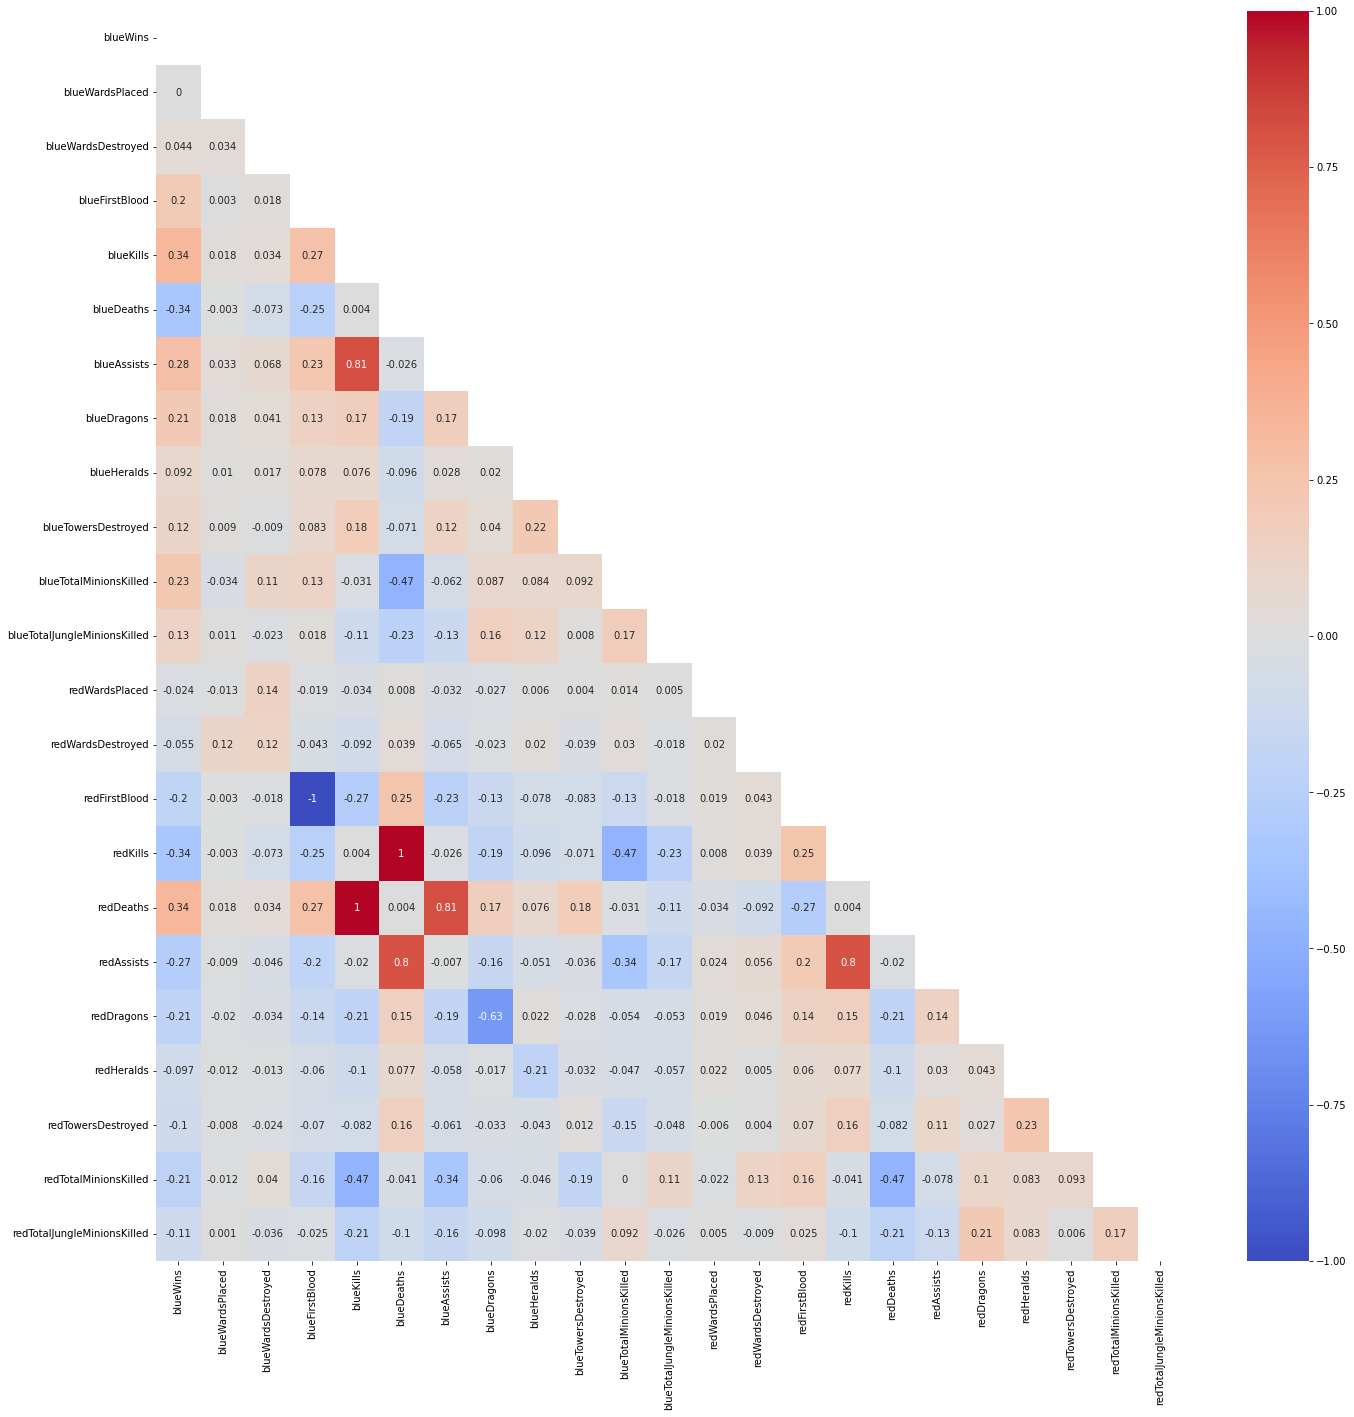

In [9]:
#create corr heatmap for df_league
corr_heatmap(df_league)

In [10]:
#now we drop highly cols with high multicollinearity
df_league.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], inplace=True)
df_league.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

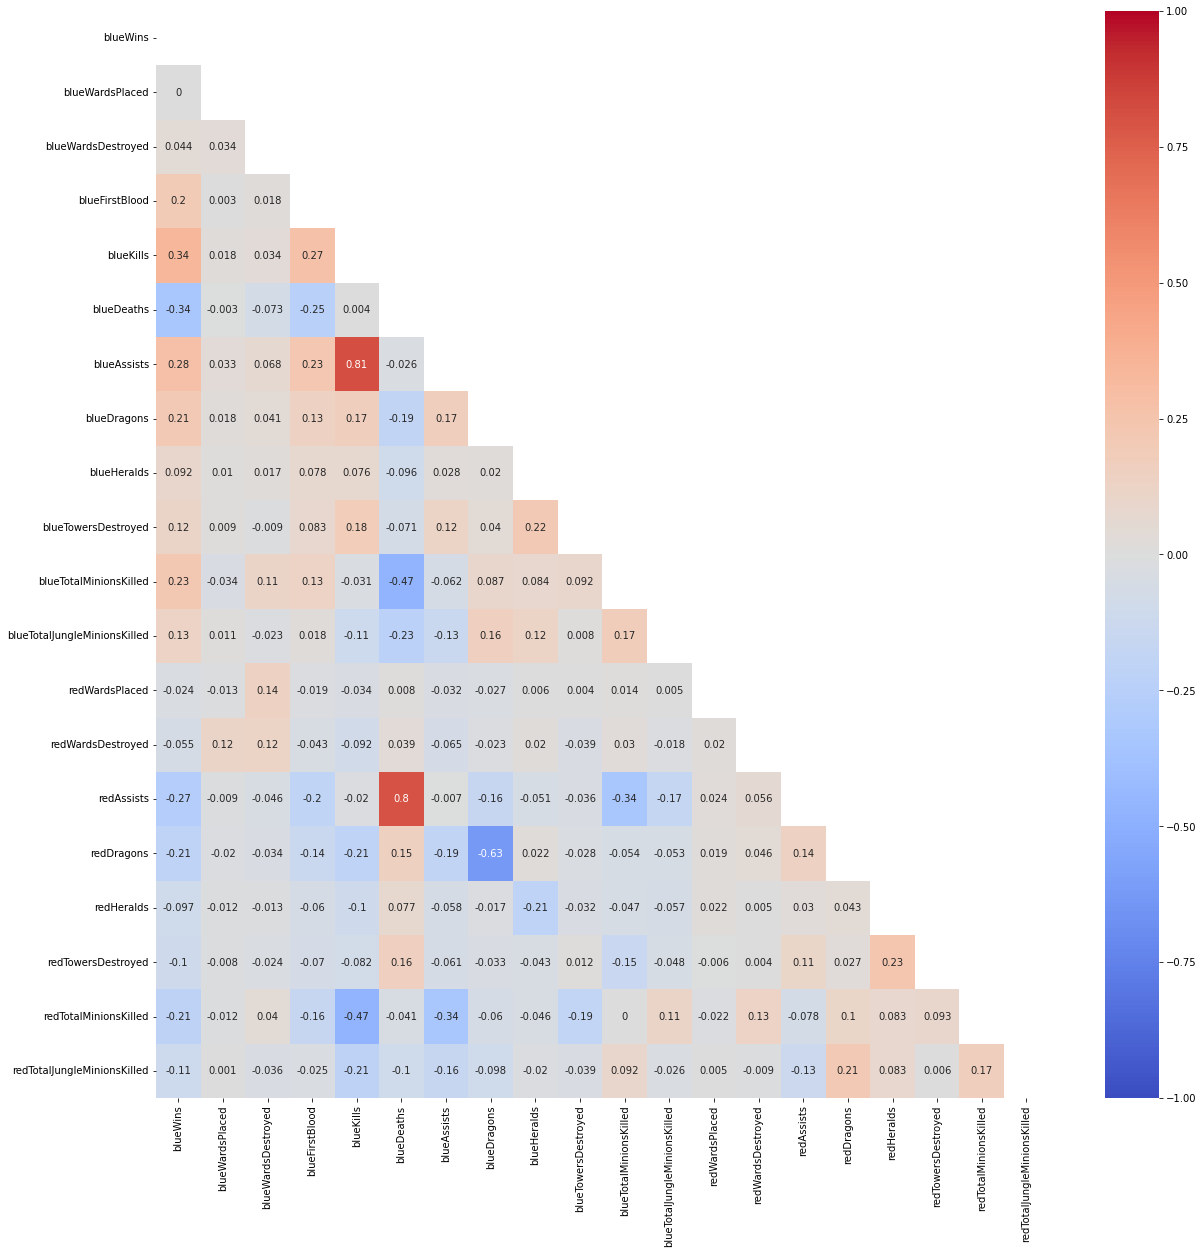

In [11]:
#create corr heatmap to verify that we no longer have multicollinearity
corr_heatmap(df_league)

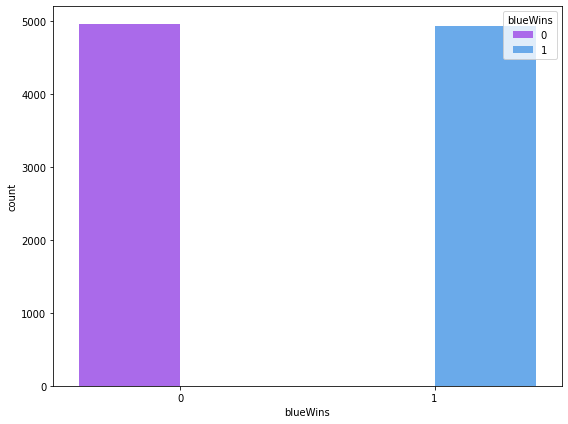

In [12]:
#plot hist
fig, ax= plt.subplots(figsize=(8,6))
#sns.histplot(x='blueWins', data=diff_df, hue='blueWins', palette='Set1', bins=(2), kde=False)
sns.countplot(x='blueWins', data=df_league, hue='blueWins', palette='cool_r')

#save as image
plt.tight_layout()

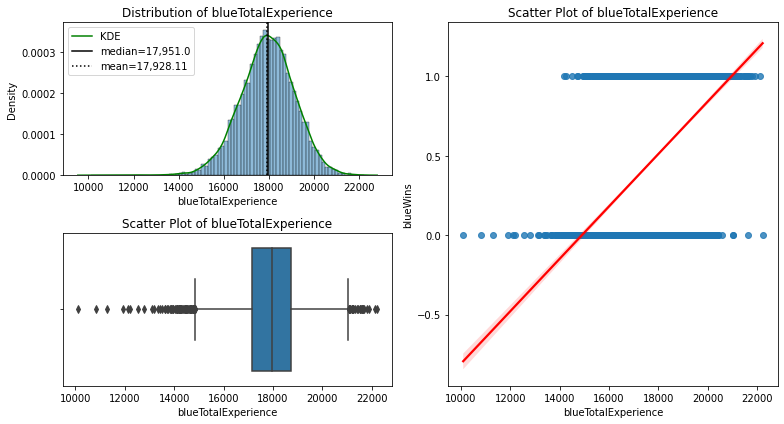

In [13]:
#plot visualization for blueTotalExperience vs blueWins
visual_eda(df_feat, 'blueWins', 'blueTotalExperience');

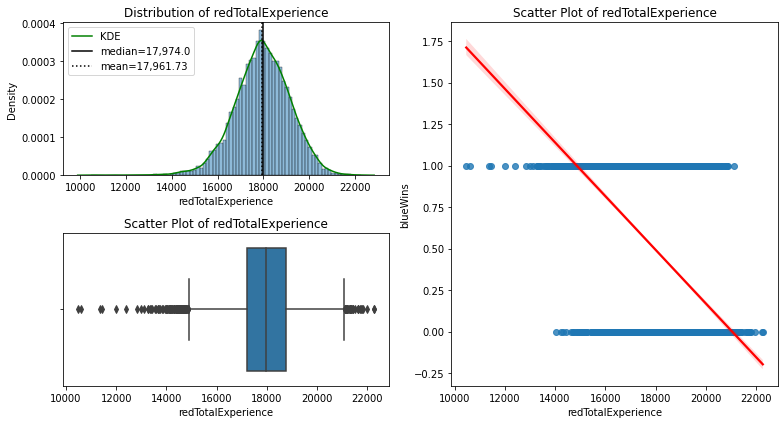

In [14]:
#plot visualization for redTotalExperience vs blueWins
visual_eda(df_feat, 'blueWins', 'redTotalExperience');

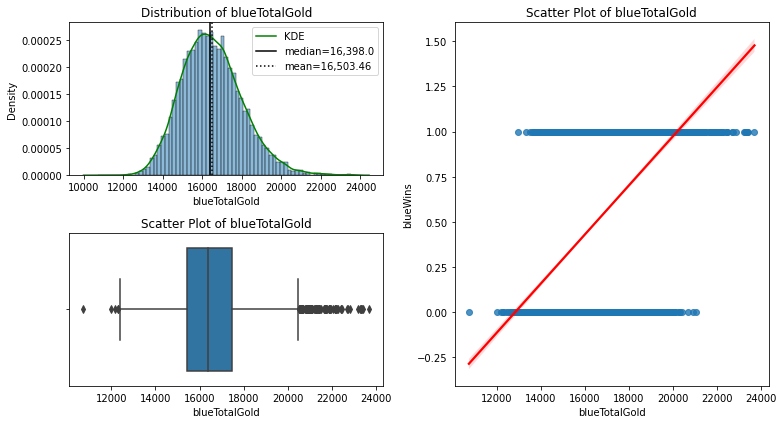

In [15]:
#plot visualization for blueTotalgold vs blueWins
visual_eda(df_feat, 'blueWins', 'blueTotalGold');

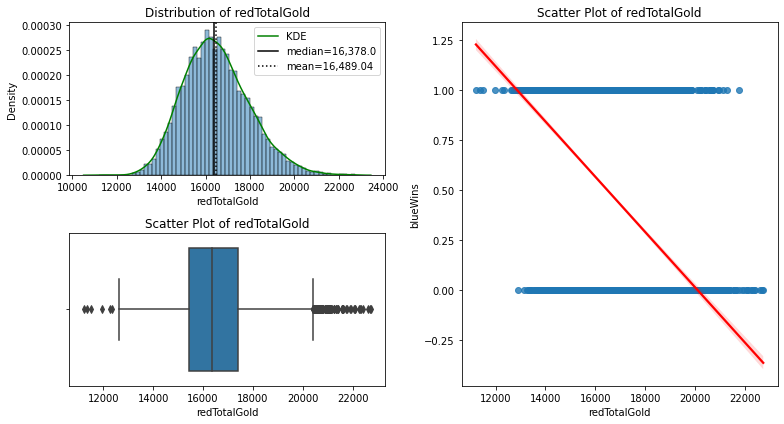

In [16]:
#plot visualization for blueTotalgold vs blueWins
visual_eda(df_feat, 'blueWins', 'redTotalGold');

In [17]:
#create func to facilitate scaling, fitting and eval multiple df

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    """
    Displays evaluation metrics including classification report, confusion matrix
    , ROC-AUC curve
    if the argument 'params' is passed, will display a table of the parameters hyperparameters 
    used in the model.
    args:
        dataframe: df with features to check multicollinearity on
        model(classifier object): typer of classificatier model to use
        X_train(df):Training data with feature vars
        y_train(Series):Training data with target vars
        X_test(df): Testing data with feature var
        y_test(Series): testing data with target var
        digits(int):colormap to display correlation range. Default is 4
        fisize(int,int): figure dims, default is (10,5)
        params(bool): Prints table of hyperparam used in model
    Returns:
    """
    #get predictions
    y_league_test=model.predict(X_test)
    y_league_train=model.predict(X_train)
    #clasification report/scores
    print("Classification Report-Training Data")
    print(metrics.classification_report(y_train,y_league_train,digits=digits))
    print("Classification Report-Test Data")
    print(metrics.classification_report(y_test,y_league_test,digits=digits))
    print("Confusion Matrix and ROC-AUC Visualization")
    fig, axes =plt.subplots(ncols=2, figsize=figsize)
    
    #confusion matrix
    metrics.plot_confusion_matix(model, X_test, y_test, normalize='true',cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    #Plot ROC curve
    metrics.plot_roc_curve(model,X_test,y_test, ax=axes[1])
    ax=axes[1]
    ax.legend()
    ax.plot([0,1],[0,1],ls="-")
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params==Trues:
       print("Model Parameters")
       params= pd.DataFrame(pd.Series(model.get_params()))
       params.columns=['parameters']
       display(params)